# Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('Australian Vehicle Prices.csv')

df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [3]:
# Remove invalid values
df = df[~df['Kilometres'].isin(['-', '- / -'])]
df = df[df['Price'] != 'POA']

# Convert to numeric types
df[['Kilometres', 'Price']] = df[['Kilometres', 'Price']].apply(pd.to_numeric, errors='coerce')

# Keep only valid kilometre and price values
df = df[df['Kilometres'] > 0].dropna(subset=['Kilometres', 'Price'])

# Convert Year to Car Age
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df.dropna(subset=['Year'], inplace=True)
df['Car_Age'] = datetime.now().year - df['Year'].astype(int)

# Extract numeric values for Seats, Doors, FuelConsumption, CylindersinEngine
for col, pat in {
    'FuelConsumption': r'(\d+\.?\d*)',
    'CylindersinEngine': r'(\d+)',
    'Doors': r'(\d+)',
    'Seats': r'(\d+)'
}.items():
    df[col] = df[col].astype(str).str.extract(pat).astype(float)

# Drop irrelevant columns
df = df.drop(columns=['Location', 'Title', 'Car/Suv', 'ColourExtInt'])

# Remove outliers using the IQR method
def iqr_filter(data, col):
    q1, q3 = data[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    return data[(data[col] >= q1 - 1.5 * iqr) & (data[col] <= q3 + 1.5 * iqr)]

for col in ['Price', 'Kilometres']:
    df = iqr_filter(df, col)

# Drop missing and duplicate rows
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Backup final data as df2
df2 = df.copy()


# EDA

C:\Users\12082\AppData\Local\Temp\ipykernel_21696\1531639480.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\12082\AppData\Local\Temp\ipykernel_21696\1531639480.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\12082\AppData\Local\Temp\ipykernel_21696\1531639480.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\12082\AppData\Local\Temp\ipykernel_21696\1531639480.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

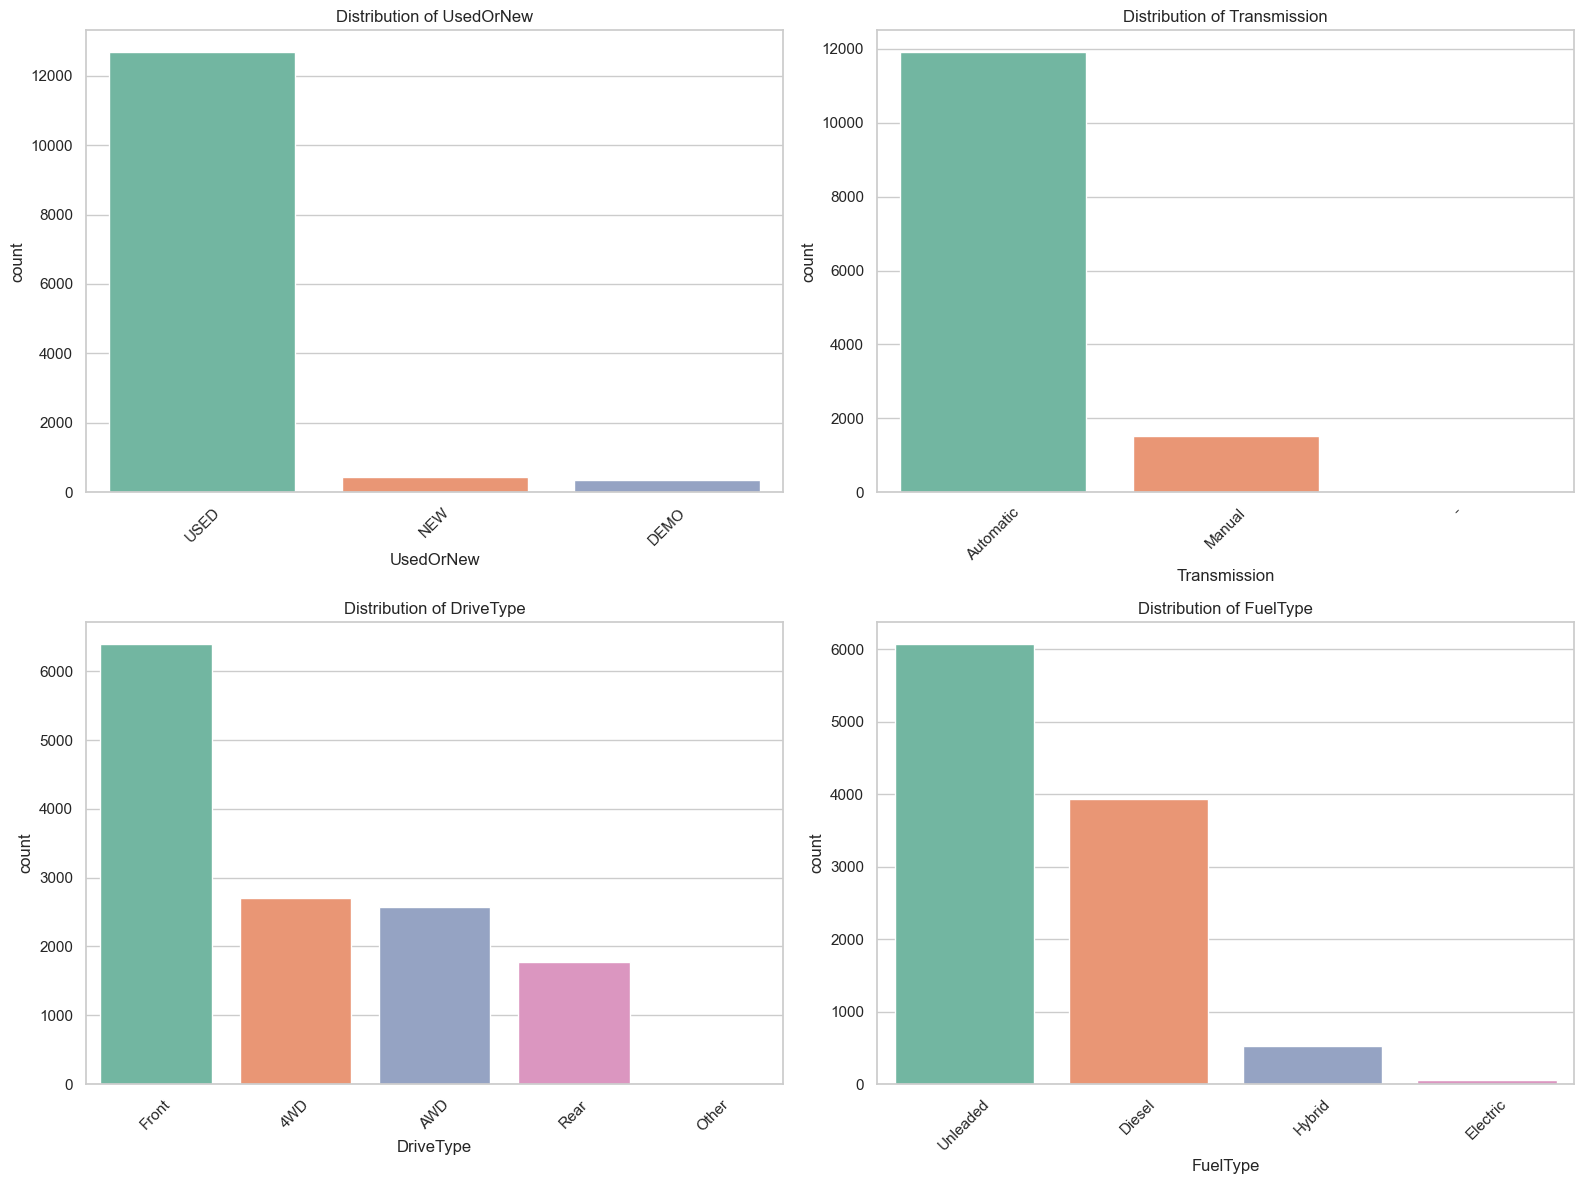

C:\Users\12082\AppData\Local\Temp\ipykernel_21696\1531639480.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\12082\AppData\Local\Temp\ipykernel_21696\1531639480.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\12082\AppData\Local\Temp\ipykernel_21696\1531639480.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\12082\AppData\Local\Temp\ipykernel_21696\1531639480.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

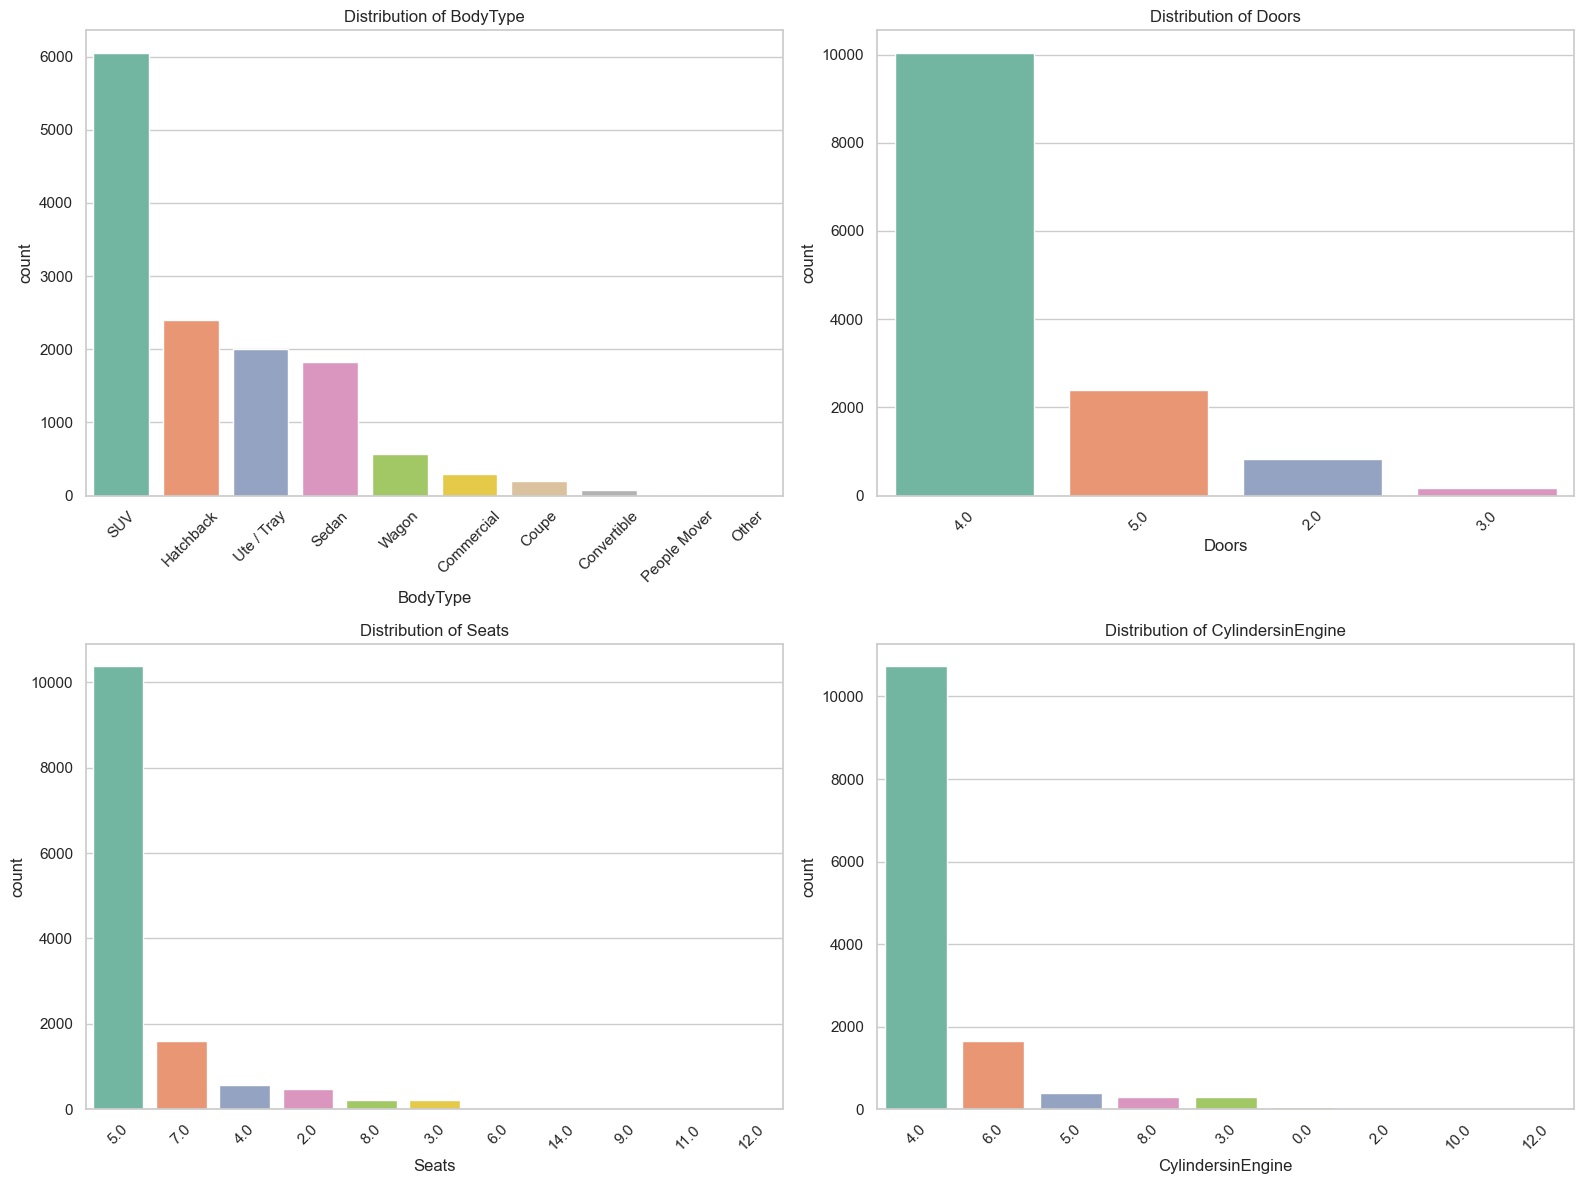

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


sns.set(style="whitegrid")

df2 = df.copy() 

categorical_rest = [
    'UsedOrNew', 'Transmission', 'DriveType',
    'FuelType', 'BodyType', 'Doors', 'Seats', 'CylindersinEngine'
]

half = len(categorical_rest) // 2
rest_part1 = categorical_rest[:half]
rest_part2 = categorical_rest[half:]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(rest_part1):
    if col == 'FuelType':
        sns.countplot(
            x=col,
            data=df2[df2['FuelType'].isin(['Unleaded', 'Diesel', 'Hybrid', 'Electric'])],
            order=['Unleaded', 'Diesel', 'Hybrid', 'Electric'],
            ax=axes[i], palette='Set2'
        )
    else:
        sns.countplot(
            x=col,
            data=df2,
            order=df2[col].value_counts().index,
            ax=axes[i], palette='Set2'
        )
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(rest_part2):
    sns.countplot(
        x=col,
        data=df2,
        order=df2[col].value_counts().index,
        ax=axes[i], palette='Set2'
    )
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



C:\Users\12082\AppData\Local\Temp\ipykernel_21696\1589321263.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Price', data=df2, ax=axes[i], palette='Set2')
C:\Users\12082\AppData\Local\Temp\ipykernel_21696\1589321263.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Price', data=df2, ax=axes[i], palette='Set2')
C:\Users\12082\AppData\Local\Temp\ipykernel_21696\1589321263.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Price', data=df2, ax=axes[i], palette='Set2')
C:\Users\12082\AppData\Local\Temp\ipy

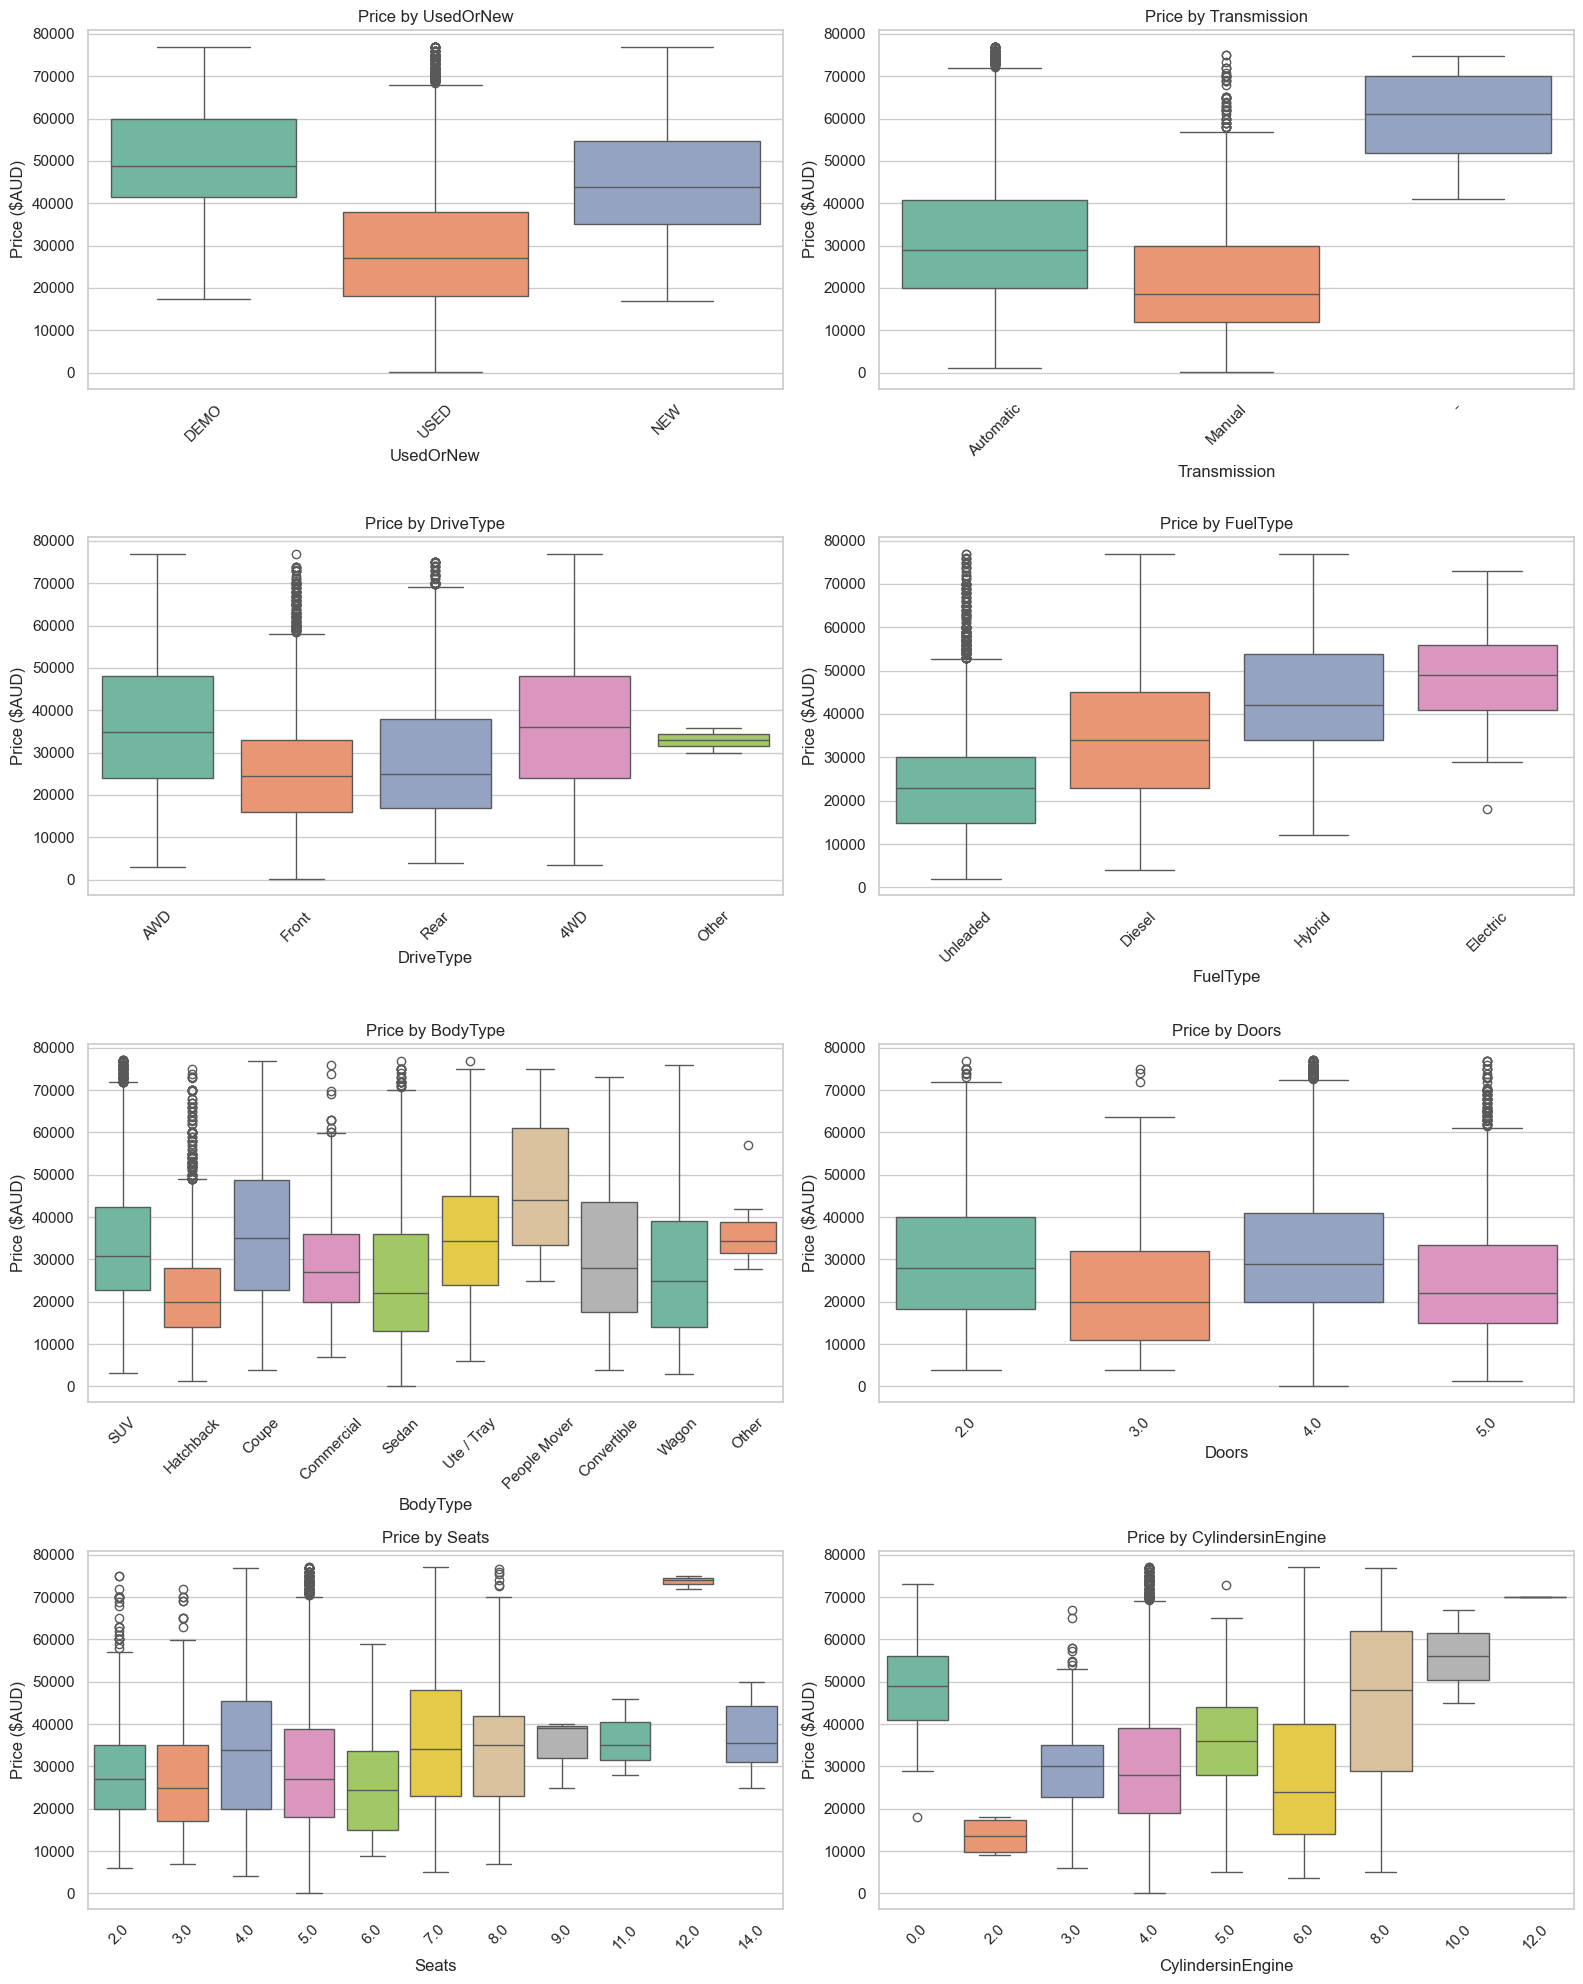

In [5]:
# ---------- Boxplot: categorical variables vs Price ----------
cat_cols = categorical_rest
df2_main_fuel = df2[df2['FuelType'].isin(['Unleaded', 'Diesel', 'Hybrid', 'Electric'])]

n = len(cat_cols)
n_cols = 2
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    if col == 'FuelType':
        sns.boxplot(
            x=col, y='Price',
            data=df2_main_fuel,
            order=['Unleaded', 'Diesel', 'Hybrid', 'Electric'],
            ax=axes[i], palette='Set2'
        )
    else:
        sns.boxplot(x=col, y='Price', data=df2, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Price by {col}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Price ($AUD)')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



C:\Users\12082\AppData\Local\Temp\ipykernel_21696\3363801391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='Price', data=df2, palette='Set2')


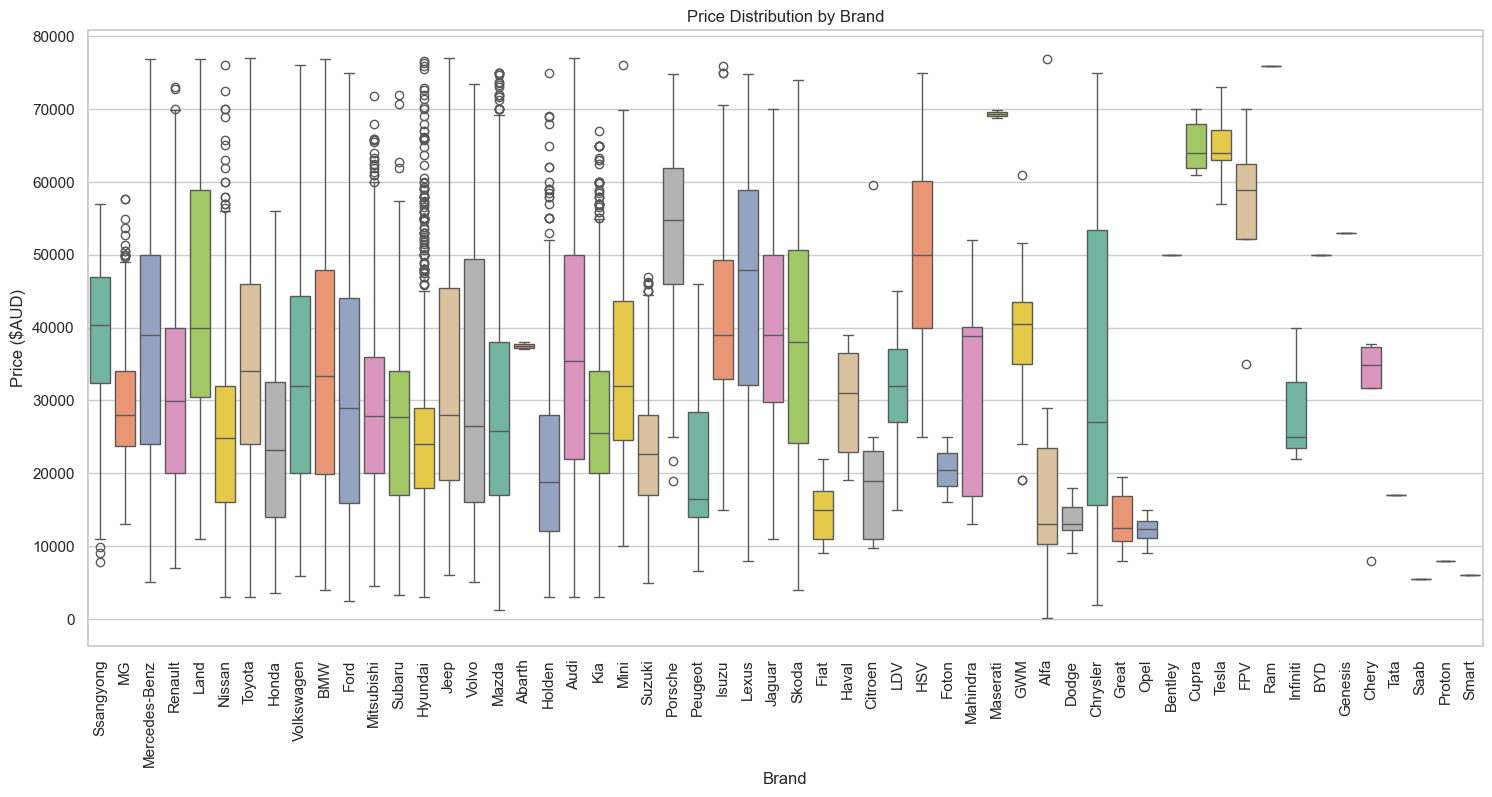

In [6]:
# ---------- Boxplot: Brand vs Price ----------
plt.figure(figsize=(18, 8))
sns.boxplot(x='Brand', y='Price', data=df2, palette='Set2')
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price ($AUD)')
plt.xticks(rotation=90)
plt.show()




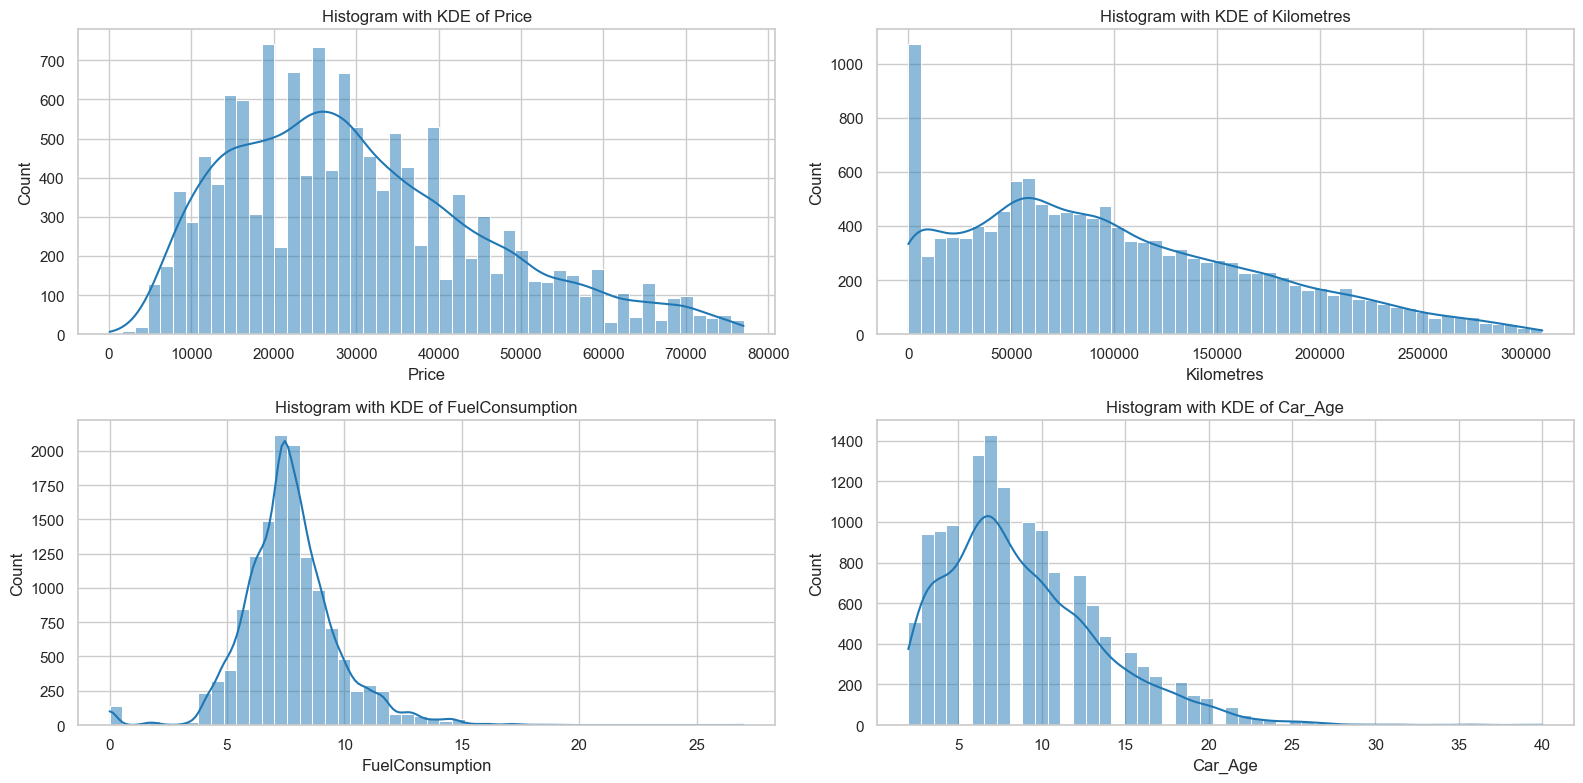

In [7]:
# ---------- Distribution of numeric variables ----------
numeric_cols = ['Price', 'Kilometres', 'FuelConsumption', 'Car_Age']

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df2[col], bins=50, kde=True, ax=axes[i], color='#1f77b4')
    axes[i].set_title(f'Histogram with KDE of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()



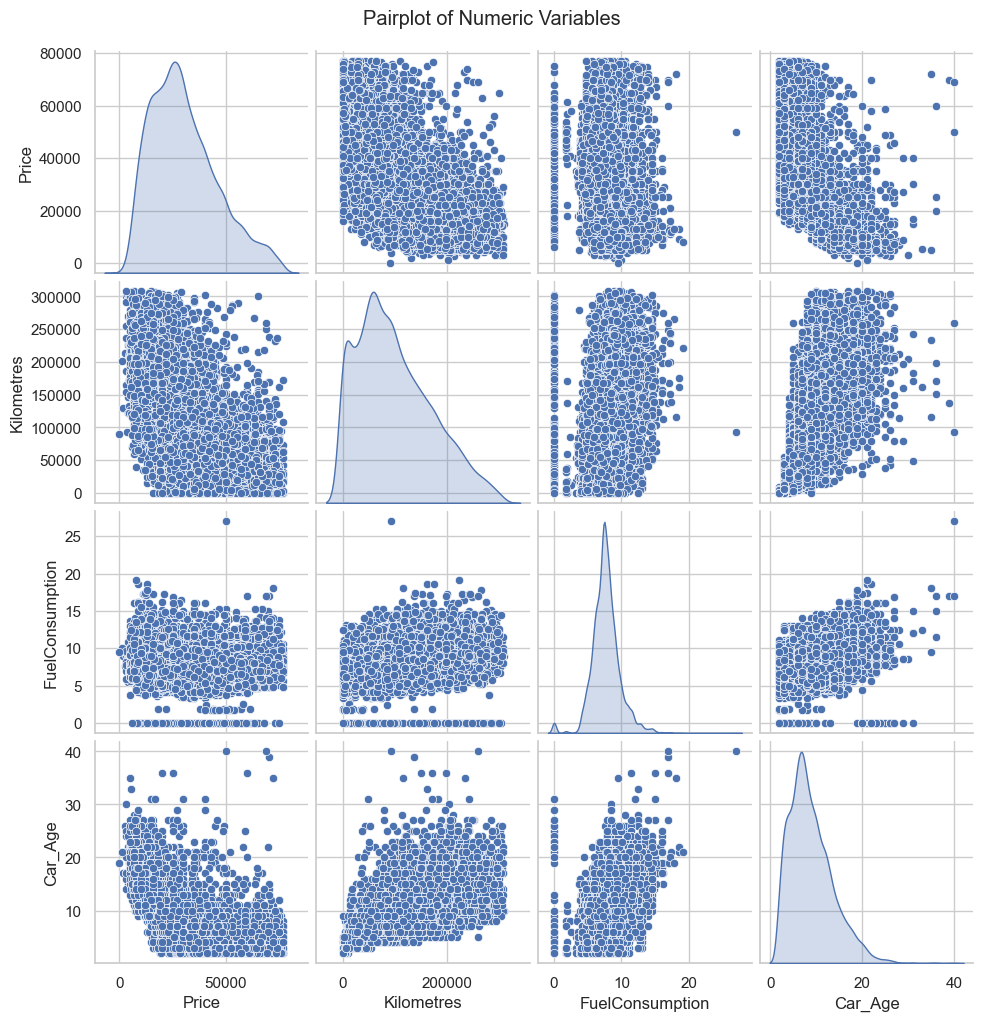

In [8]:
# ---------- Pairplot ----------
sns.pairplot(df2[numeric_cols], diag_kind='kde')
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()



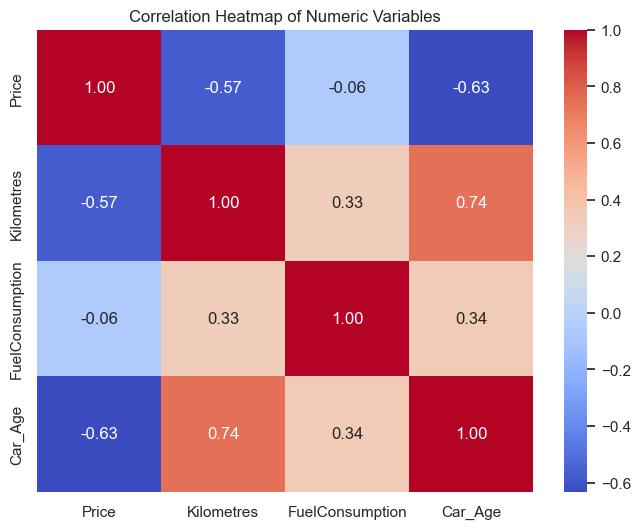

In [9]:
# ---------- Correlation heatmap ----------
corr = df2[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()



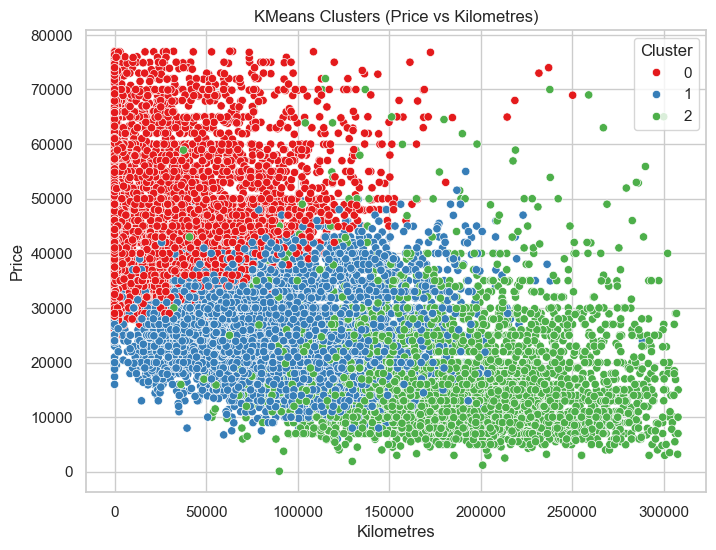

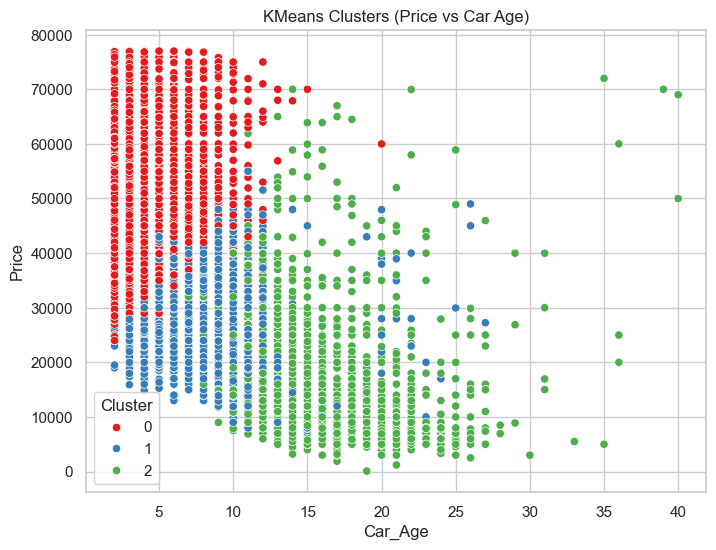

Cluster Summary:

                Price     Kilometres    Car_Age  FuelConsumption
Cluster                                                         
0        48973.862833   38285.569828   4.861588         7.521533
1        26177.336867   88504.680062   8.129788         6.852548
2        16983.496234  186517.779079  14.547559         9.173529


In [10]:
# ---------- KMeans clustering ----------
X_cluster = df2[['Price', 'Kilometres', 'Car_Age', 'FuelConsumption']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
df2['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster scatter plot: Price vs Kilometres
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='Kilometres', y='Price', hue='Cluster', palette='Set1')
plt.title('KMeans Clusters (Price vs Kilometres)')
plt.show()

# Cluster scatter plot: Price vs Car Age
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='Car_Age', y='Price', hue='Cluster', palette='Set1')
plt.title('KMeans Clusters (Price vs Car Age)')
plt.show()

# Cluster summary statistics
print("Cluster Summary:\n")
print(df2.groupby('Cluster')[['Price', 'Kilometres', 'Car_Age', 'FuelConsumption']].mean())



Intercept: 30543.333188457196
Coefficients: {'Kilometres': np.float64(-4053.893119193138), 'Car_Age': np.float64(-7865.699251251814), 'FuelConsumption': np.float64(3115.7676506254056)}
R² score on test set: 0.4807607925543649


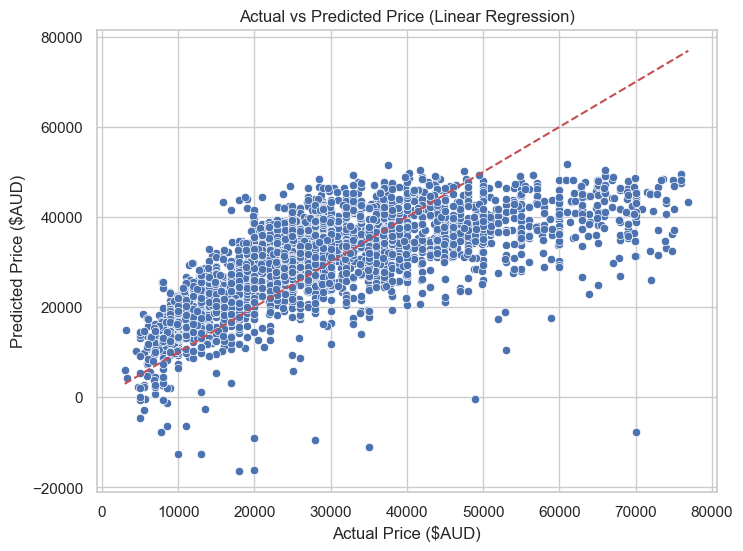

In [11]:
# ---------- Multiple linear regression ----------
features = ['Kilometres', 'Car_Age', 'FuelConsumption']
target = 'Price'

X = df2[features]
y = df2[target]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Intercept:", lr.intercept_)
print("Coefficients:", dict(zip(features, lr.coef_)))

# Prediction and evaluation
y_pred = lr.predict(X_test)
print("R² score on test set:", r2_score(y_test, y_pred))

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price ($AUD)')
plt.ylabel('Predicted Price ($AUD)')
plt.title('Actual vs Predicted Price (Linear Regression)')
plt.show()

# Random Forest

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'log2', 'regressor__max_depth': None}
MAE: 3599.48
RMSE: 5136.25
R² Score: 0.8921
±10% Accuracy: 0.518


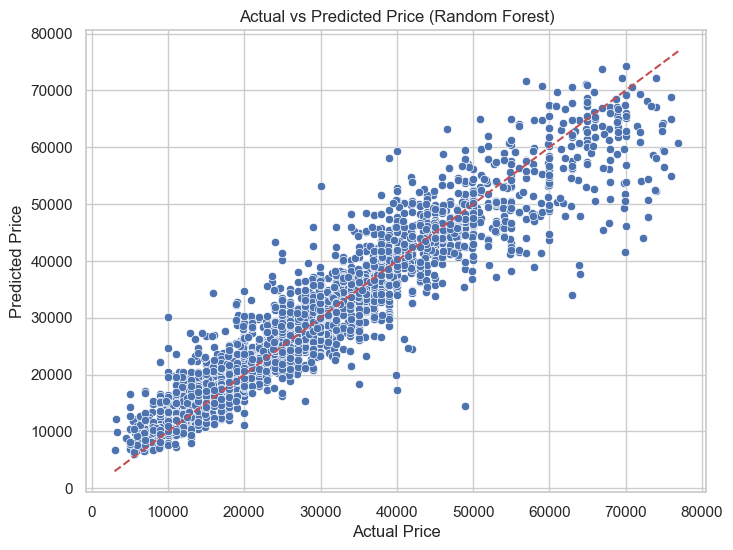

In [12]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ========= Feature selection (retain Seats and Doors) =========
features = ['Brand', 'Transmission', 'DriveType', 'FuelType',
            'BodyType', 'CylindersinEngine', 'Seats', 'Doors',
            'Kilometres', 'Car_Age']
target = 'Price'

X = df[features]
y = df[target]

# Categorical and numerical features
categorical = ['Brand', 'Transmission', 'DriveType', 'FuelType', 'BodyType']
numerical = ['CylindersinEngine', 'Seats', 'Doors', 'Kilometres', 'Car_Age']

# ========= Split the data =========
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ========= Build preprocessor =========
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('num', StandardScaler(), numerical)
])

# ========= Build random forest pipeline =========
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# ========= Define hyperparameter search space =========
param_dist = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 15, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2']
}

# ========= Perform randomized search =========
search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring='neg_mean_absolute_error'
)

search.fit(X_train, y_train)

# ========= Evaluate model performance =========
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
accuracy_10pct = np.mean(np.abs(y_pred - y_test) / y_test <= 0.1)

# ========= Print results (clean version) =========
print("Best Parameters:", search.best_params_)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"±10% Accuracy: {accuracy_10pct:.3f}")

# ========= Plot actual vs predicted values =========
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Random Forest)')
plt.show()


Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\12082\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'regressor__n_estimators': 500, 'regressor__min_samples_leaf': 1}
MAE: 3591.17
RMSE: 5133.32
R² Score: 0.8922
±10% Accuracy: 0.518


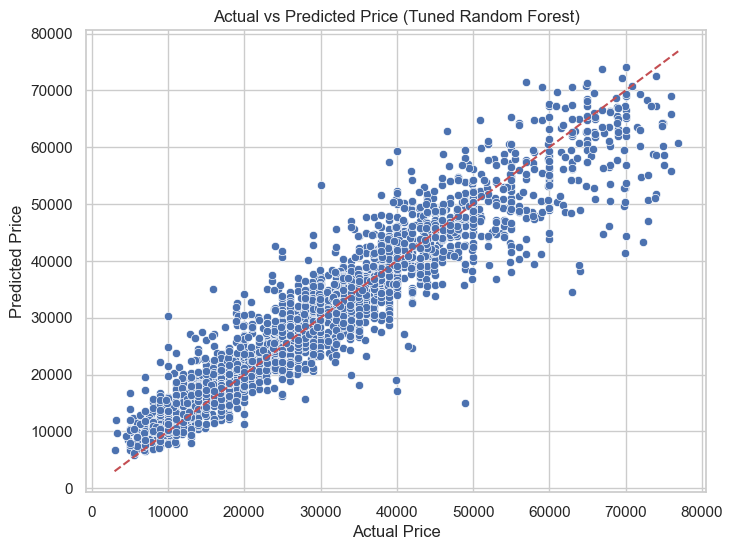

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ========= Second-round fine-tuned model (some parameters fixed) =========
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        random_state=42,
        max_depth=None,
        min_samples_split=2,
        max_features='log2'
    ))
])

# ========= Refined hyperparameter search space =========
param_dist_refined = {
    'regressor__n_estimators': [200, 300, 400, 500],
    'regressor__min_samples_leaf': [1, 2, 3, 4]
}

# ========= RandomizedSearchCV tuning =========
search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_dist_refined,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring='neg_mean_absolute_error'
)

search.fit(X_train, y_train)

# ========= Evaluate model =========
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
r2 = r2_score(y_test, y_pred)
accuracy_10pct = np.mean(np.abs(y_pred - y_test) / y_test <= 0.1)

# ========= Print evaluation results (clean version) =========
print("Best Parameters:", search.best_params_)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"±10% Accuracy: {accuracy_10pct:.3f}")

# ========= Visualize actual vs predicted prices =========
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Tuned Random Forest)')
plt.show()


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'regressor__n_estimators': 800, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'sqrt', 'regressor__max_depth': 25, 'regressor__bootstrap': False}
MAE: 3558.01
RMSE: 5043.23
R² Score: 0.8960
±10% Accuracy: 0.518


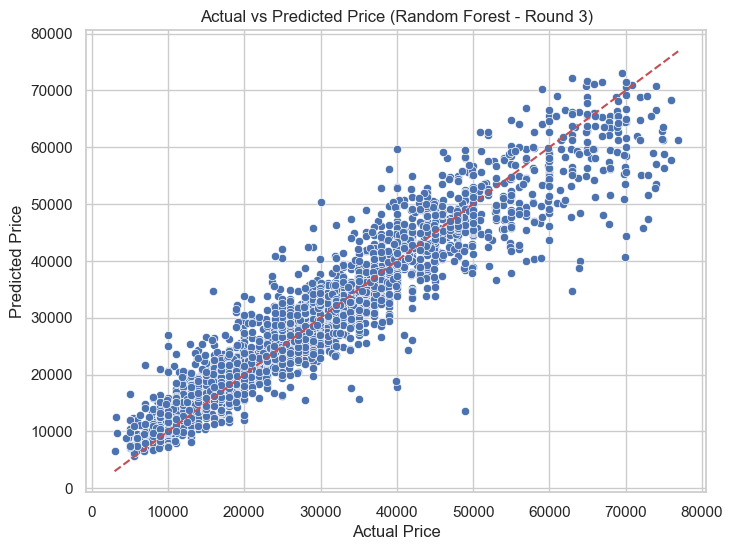

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ========= Third-round model tuning (expanded search) =========
param_dist_new = {
    'regressor__n_estimators': [400, 500, 600, 800],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__max_depth': [15, 20, 25, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__max_features': ['sqrt', 'log2'],
    'regressor__bootstrap': [True, False]
}

search_new = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_dist_new,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring='neg_mean_absolute_error'
)

search_new.fit(X_train, y_train)

# Evaluate model
best_model = search_new.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
r2 = r2_score(y_test, y_pred)
accuracy_10pct = np.mean(np.abs(y_pred - y_test) / y_test <= 0.1)

# Output results
print("Best Parameters:", search_new.best_params_)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"±10% Accuracy: {accuracy_10pct:.3f}")

# Visualize prediction
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Random Forest - Round 3)')
plt.show()


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'regressor__bootstrap': False, 'regressor__max_depth': 25, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 4, 'regressor__n_estimators': 1000}
MAE: 3564.61
RMSE: 5064.70
R² Score: 0.8951
±10% Accuracy: 0.522


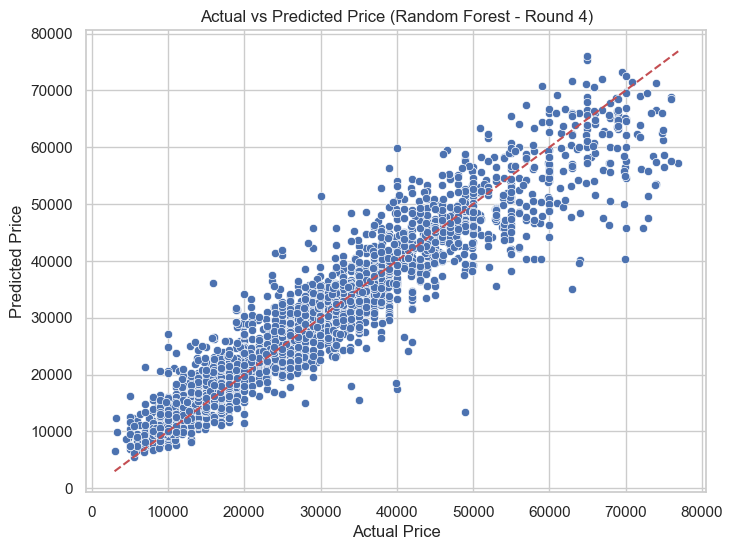

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ========= Fourth-round model tuning (grid search) =========
param_grid_fine = {
    'regressor__n_estimators': [700, 800, 900, 1000],
    'regressor__max_depth': [20, 25, 30],
    'regressor__min_samples_split': [4, 5, 6, 8],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__max_features': ['sqrt'],
    'regressor__bootstrap': [False]
}

grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_fine,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='neg_mean_absolute_error'
)

grid_search.fit(X_train, y_train)

# Evaluate model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
r2 = r2_score(y_test, y_pred)
accuracy_10pct = np.mean(np.abs(y_pred - y_test) / y_test <= 0.1)

# Output results
print("Best Parameters:", grid_search.best_params_)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"±10% Accuracy: {accuracy_10pct:.3f}")

# Visualize prediction
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Random Forest - Round 4)')
plt.show()


# XGBoost

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'regressor__subsample': 0.8, 'regressor__n_estimators': 500, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.1, 'regressor__gamma': 1, 'regressor__colsample_bytree': 0.8}
MAE: 3250.45
RMSE: 4658.84
R² Score: 0.9112
±10% Accuracy: 0.546


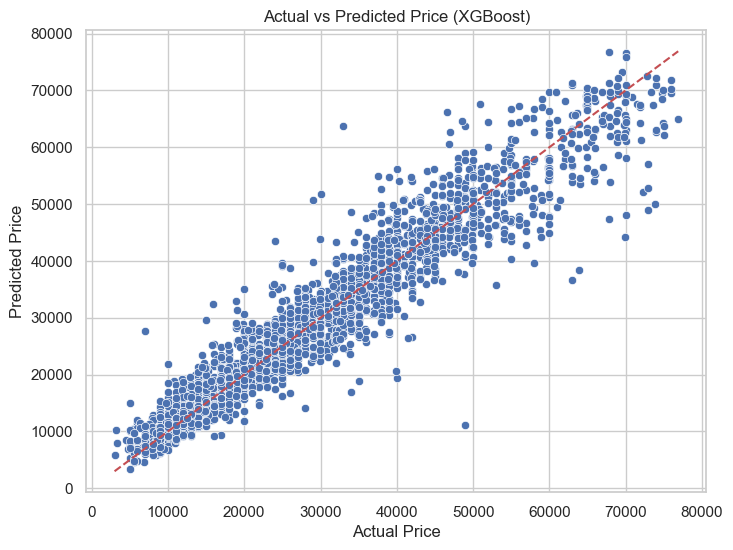

In [16]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ========= Build XGBoost pipeline =========
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0))
])

# ========= Define hyperparameter search space =========
param_dist_xgb = {
    'regressor__n_estimators': [100, 300, 500],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0],
    'regressor__gamma': [0, 1, 5]
}

# ========= RandomizedSearchCV for tuning =========
search_xgb = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist_xgb,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring='neg_mean_absolute_error'
)

# ========= Train XGBoost model =========
search_xgb.fit(X_train, y_train)

# ========= Evaluate model =========
best_model_xgb = search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(np.mean((y_test - y_pred_xgb) ** 2))
r2 = r2_score(y_test, y_pred_xgb)
accuracy_10pct = np.mean(np.abs(y_pred_xgb - y_test) / y_test <= 0.1)

# ========= Print results =========
print("Best Parameters:", search_xgb.best_params_)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"±10% Accuracy: {accuracy_10pct:.3f}")

# ========= Plot actual vs predicted values =========
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (XGBoost)')
plt.show()


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'regressor__subsample': 0.8, 'regressor__reg_lambda': 2, 'regressor__reg_alpha': 0, 'regressor__n_estimators': 1000, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.05, 'regressor__gamma': 0, 'regressor__colsample_bytree': 0.7}
MAE: 3209.56
RMSE: 4604.60
R² Score: 0.9133
±10% Accuracy: 0.545


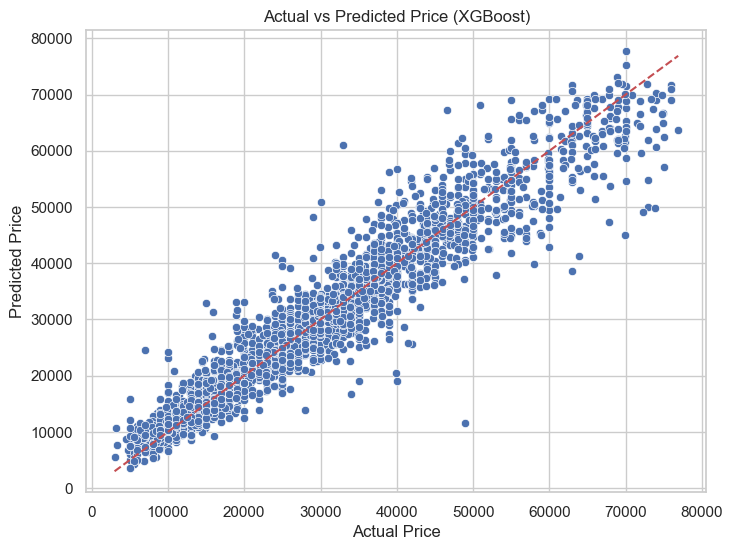

In [17]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ========= Build XGBoost pipeline =========
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0))
])

# ========= Refined hyperparameter search space =========
param_dist_xgb = {
    'regressor__n_estimators': [600, 800, 1000],
    'regressor__learning_rate': [0.03, 0.05, 0.07],
    'regressor__max_depth': [6, 7, 8, 9],
    'regressor__subsample': [0.7, 0.8, 0.9],
    'regressor__colsample_bytree': [0.7, 0.8, 0.9],
    'regressor__gamma': [0, 1, 3],
    'regressor__reg_alpha': [0, 0.1, 0.5],
    'regressor__reg_lambda': [1, 1.5, 2]
}

# ========= RandomizedSearchCV tuner =========
search_xgb = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist_xgb,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    scoring='neg_mean_absolute_error'
)

# ========= Fit tuning =========
search_xgb.fit(X_train, y_train)

# ========= Evaluation =========
best_model = search_xgb.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
r2 = r2_score(y_test, y_pred)
accuracy_10pct = np.mean(np.abs(y_pred - y_test) / y_test <= 0.1)

# ========= Print results (clean) =========
print("Best Parameters:", search_xgb.best_params_)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"±10% Accuracy: {accuracy_10pct:.3f}")

# ========= Visualization: Actual vs Predicted =========
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (XGBoost)')
plt.show()


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'regressor__subsample': 0.8, 'regressor__reg_lambda': 1.5, 'regressor__reg_alpha': 0.3, 'regressor__n_estimators': 2000, 'regressor__max_depth': 7, 'regressor__learning_rate': 0.02, 'regressor__gamma': 0, 'regressor__colsample_bytree': 0.7}
MAE: 3188.87
RMSE: 4561.09
R² Score: 0.9149
±10% Accuracy: 0.552
Best CV Score (MAE): 3381.08


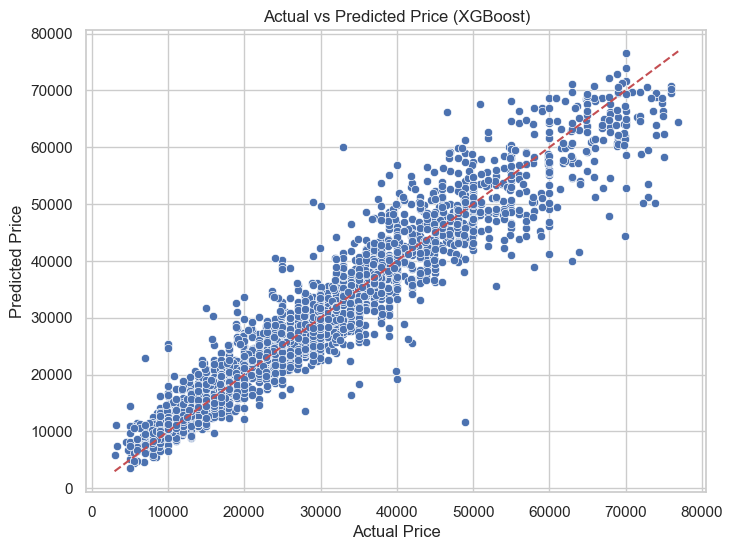

In [18]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ====== Build XGBoost pipeline ======
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # use the preprocessor defined earlier
    ('regressor', XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        verbosity=0,
        n_jobs=-1
    ))
])

# ====== Refined hyperparameter search space (optimized) ======
param_dist_xgb = {
    'regressor__n_estimators': [1200, 1500, 2000],
    'regressor__learning_rate': [0.01, 0.02, 0.03],
    'regressor__max_depth': [6, 7],
    'regressor__subsample': [0.7, 0.8],
    'regressor__colsample_bytree': [0.7, 0.8],
    'regressor__gamma': [0, 1],
    'regressor__reg_alpha': [0.1, 0.3, 0.5],
    'regressor__reg_lambda': [1.5, 2]
}

# ====== RandomizedSearchCV tuner (time-efficient) ======
search_xgb = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=param_dist_xgb,
    n_iter=30,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# ====== Fit tuning ======
search_xgb.fit(X_train, y_train)

# ====== Evaluation ======
best_model = search_xgb.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
r2 = r2_score(y_test, y_pred)
accuracy_10pct = np.mean(np.abs(y_pred - y_test) / y_test <= 0.1)
cv_mae = -search_xgb.best_score_  # convert from negative MAE

# ====== Print results (clean) ======
print("Best Parameters:", search_xgb.best_params_)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"±10% Accuracy: {accuracy_10pct:.3f}")
print(f"Best CV Score (MAE): {cv_mae:.2f}")

# ====== Visualization: Actual vs Predicted ======
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (XGBoost)')
plt.show()


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Parameters: {'regressor__colsample_bytree': 0.7, 'regressor__gamma': 0, 'regressor__learning_rate': 0.02, 'regressor__max_depth': 7, 'regressor__n_estimators': 2200, 'regressor__reg_alpha': 0.3, 'regressor__reg_lambda': 2, 'regressor__subsample': 0.8}
MAE: 3192.73
RMSE: 4559.47
R² Score: 0.9150
±10% Accuracy: 0.546
Best CV Score (MAE): 3377.46


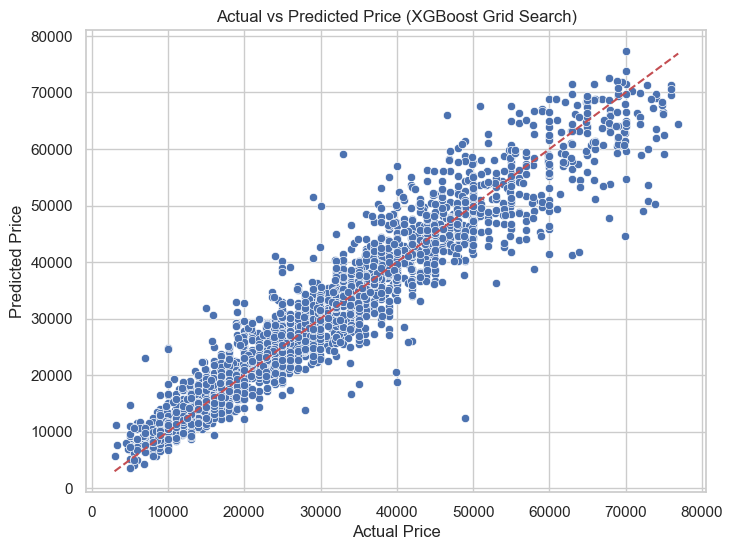

In [21]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ====== Build XGBoost pipeline ======
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror',
                               random_state=42, verbosity=0, n_jobs=-1))
])

# ====== Fine-grained search space (around previous best) ======
param_grid_xgb = {
    'regressor__n_estimators': [1800, 2000, 2200],
    'regressor__learning_rate': [0.015, 0.02, 0.025],
    'regressor__max_depth': [6, 7],
    'regressor__subsample': [0.75, 0.8],
    'regressor__colsample_bytree': [0.7, 0.75],
    'regressor__gamma': [0, 1],
    'regressor__reg_alpha': [0.2, 0.3, 0.4],
    'regressor__reg_lambda': [1.5, 2]
}

# ====== GridSearchCV (XGB) ======
xgb_grid_search = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

# ====== Fit search ======
xgb_grid_search.fit(X_train, y_train)

# ====== Evaluation ======
xgb_best_model = xgb_grid_search.best_estimator_
y_pred = xgb_best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
r2 = r2_score(y_test, y_pred)
accuracy_10pct = np.mean(np.abs(y_pred - y_test) / y_test <= 0.1)
cv_mae = -xgb_grid_search.best_score_

# ====== Print results (clean) ======
print("Best Parameters:", xgb_grid_search.best_params_)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"±10% Accuracy: {accuracy_10pct:.3f}")
print(f"Best CV Score (MAE): {cv_mae:.2f}")

# ====== Visualization ======
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (XGBoost Grid Search)')
plt.show()


# Result

Saved files:
 - rf_xgb_round_results_mae_r2.csv
 - rf_xgb_round_results_mae_r2.xlsx

Preview:
  Round          Model      MAE      R²
0    R1  Random Forest  3599.48  0.8921
1    R2  Random Forest  3591.17  0.8922
2    R3  Random Forest  3558.01  0.8960
3    R4  Random Forest  3564.61  0.8951
4    R1        XGBoost  3250.45  0.9112
5    R2        XGBoost  3209.56  0.9133
6    R3        XGBoost  3188.87  0.9149
7    R4        XGBoost  3192.73  0.9150


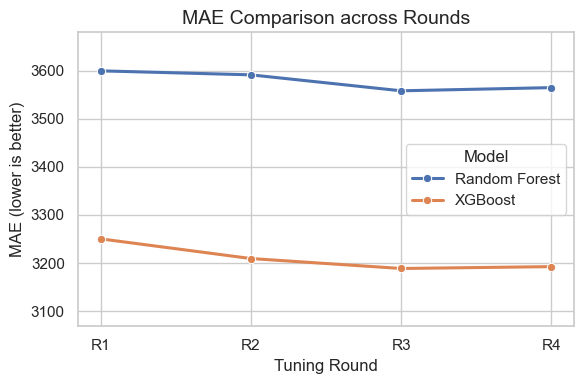

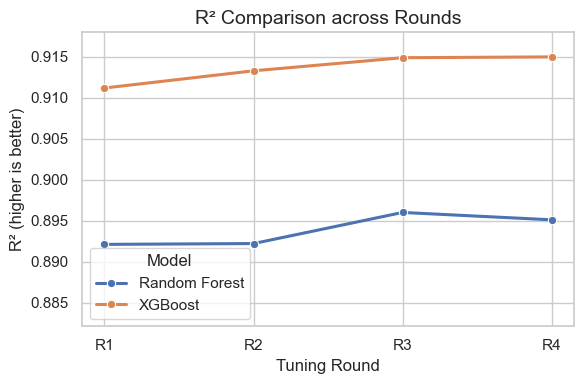

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys, subprocess

# ---------- Helper: open a file with the system default app ----------
def open_file(path: str):
    try:
        if sys.platform.startswith('win'):
            os.startfile(path)                    # Windows
        elif sys.platform == 'darwin':
            subprocess.call(['open', path])       # macOS
        else:
            subprocess.call(['xdg-open', path])   # Linux
    except Exception as e:
        print(f"Could not auto-open {path}: {e}")

# ---------- 1) Enter results: RF (R1→R4) and XGB (R1→R4) ----------
# Replace numbers here if your final metrics change later.

# Random Forest
rf_mae = [3599.48, 3591.17, 3558.01, 3564.61]
rf_r2  = [0.8921, 0.8922, 0.8960, 0.8951]

# XGBoost
xgb_mae = [3250.45, 3209.56, 3188.87, 3192.73]
xgb_r2  = [0.9112, 0.9133, 0.9149, 0.9150]

rounds = ["R1", "R2", "R3", "R4"]

# ---------- 2) Build a combined DataFrame ----------
df = pd.DataFrame({
    "Round": rounds * 2,
    "Model": ["Random Forest"] * 4 + ["XGBoost"] * 4,
    "MAE": rf_mae + xgb_mae,
    "R²":  rf_r2  + xgb_r2
})

# ---------- 3) Save results (CSV + Excel) and auto-open Excel ----------
csv_path  = "rf_xgb_round_results_mae_r2.csv"
xlsx_path = "rf_xgb_round_results_mae_r2.xlsx"
df.to_csv(csv_path, index=False, encoding="utf-8-sig")
df.to_excel(xlsx_path, index=False)

print("Saved files:")
print(f" - {csv_path}")
print(f" - {xlsx_path}")
print("\nPreview:")
print(df)

open_file(xlsx_path)

# ---------- 4) Visualization: narrow line plots with tighter y-axes ----------
sns.set(style="whitegrid")

# MAE line plot (narrow figure, clearer trend)
plt.figure(figsize=(6, 4))  # narrower width emphasizes slope
sns.lineplot(data=df, x="Round", y="MAE", hue="Model", marker="o", linewidth=2.2)
# Start y-axis closer to the data range for a clearer trend
ymin_mae = min(rf_mae + xgb_mae) - 120
ymax_mae = max(rf_mae + xgb_mae) + 80
plt.ylim(ymin_mae, ymax_mae)
plt.title("MAE Comparison across Rounds", fontsize=14)
plt.ylabel("MAE (lower is better)")
plt.xlabel("Tuning Round")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

# R² line plot (narrow figure, clearer trend)
plt.figure(figsize=(6, 4))
sns.lineplot(data=df, x="Round", y="R²", hue="Model", marker="o", linewidth=2.2)
# Start y-axis close to lower bound to highlight small changes
ymin_r2 = min(rf_r2 + xgb_r2) - 0.01
ymax_r2 = max(rf_r2 + xgb_r2) + 0.003
plt.ylim(ymin_r2, ymax_r2)
plt.title("R² Comparison across Rounds", fontsize=14)
plt.ylabel("R² (higher is better)")
plt.xlabel("Tuning Round")
plt.legend(title="Model")
plt.tight_layout()
plt.show()
